# Project: Exploring COVID-19 Data 🦠


<img src="data/covid.png" width=70%>



In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import otter
import numbers
import IPython
grader = otter.Notebook()

### Background

During the end of the year 2019, the novel coronavirus started spreading around the world, causing many people to contract COVID-19. It didn't take long for the virus to spread from Wuhan, China to pretty much everywhere else in the world. At first, no one realized the severity of the virus and its potential to change lives as drastically as it has. In February 2020, the number of COVID-19 cases in the United States started to grow exponentially. Various measures, like face covering regulations, stay at home mandates, and vaccines, have helped control the virus, but it still continues to affect the world greatly, even two years later. In the US, there have been over 80 million cases of COVID-19, and nearly 1 million people have died as a result. 

In this project, we will be analyzing COVID-19 data in the United States, using national data from fall 2020, broken down by state and by day. The data we have comes from the [COVID-19 Tracking Project](https://covidtracking.com/), License: CC BY 4.0.

### Outline of the Project 

The project is divided into eight sections. Use the outline below to help you quickly navigate to the part of the project you are looking for.

-  Section 1. [Meet the Data 👋 💾](#part1_section1)  
-  Section 2. [Working with `datetime`s 📆 🕗](#part1_section2) 
-  Section 3. [Exploratory Data Analysis 🔎](#part1_section3)  
-  Section 4. [Exponential Growth? 🚀](#part1_section4)  
-  Section 5. [Weekdays vs. Weekends 👔 🆚 🏄](#part1_section5)  
-  Section 6. [Rates Per 100,000 People 👩‍🦱👦🏾🧑👩🏿‍🦰👩🏽‍🦱🧔👱‍♀️](#part1_section6) 
-  Section 7. [Mask Mandates 😷](#part1_section7) 
-  Section 8. [Political Parties 🐘 🐎](#part1_section8) 


<a id='part1_section1'></a>
### Section 1: Meet the Data 👋 💾

In [2]:
covid_raw = bpd.read_csv('data/covid_tracking_data.csv')
covid_raw

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237
...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176


For each of the 50 United States, plus the District of Columbia (DC), there is a separate row for each date in  October (31 days), November (30 days), and December (31 days). So the total number of rows is:

In [3]:
 51*(31+30+31)

4692

Each row of the DataFrame represents both a state and a date. 

There are ten columns of data, reading from left to right:

1. `'date'`: The date written as a string in the format month/day/year.
2. `'state'`: The two-letter [postal code abbreviation](https://pe.usps.com/text/pub28/28apb.htm) for the state.
3. `'death'`: The total (cumulative) number of COVID-19 related deaths recorded for that state, either on that date or a prior date.
4. `'deathIncrease'`: The increase in the number of COVID-19 related deaths from the previous day, for the same state. 
5. `'hospitalized'`: The total (cumulative) number of COVID-19 related hospitalizations recorded for that state, either on that date or a prior date.
6. `'hospitalizedIncrease'`: The increase in the number of COVID-19 related hospitalizations from the previous day, for the same state. 
7. `'negative'`: The total (cumulative) number of negative COVID-19 tests recorded for that state, either on that date or a prior date.
8. `'negativeIncrease'`: The increase in the number of negative COVID-19 tests from the previous day, for the same state. 
9. `'positive'`: The total (cumulative) number of positive COVID-19 tests recorded for that state, either on that date or a prior date.
10. `'positiveIncrease'`: The increase in the number of positive COVID-19 tests from the previous day, for the same state.

Notice that the columns that end in `'Increase'` should never contain negative numbers, since cumulative totals should only increase over time. However, due to errors in the data, sometimes they are negative. I will analyze the data as it's reported, without correcting these errors.

In [4]:
covid_raw = covid_raw.assign(
    totalTestResults=covid_raw.get('positive') + covid_raw.get('negative'),
    totalTestResultsIncrease=covid_raw.get('positiveIncrease') + covid_raw.get('negativeIncrease')
)
covid_raw

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406
...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020


<a id='part1_section2'></a>
### Section 2: Working with `datetime`s 📆 🕗

We want to perform some analysis using the `'date'` column, but it's not so easy to answer certain questions given the current format of the date. For example, which month had the most positive tests? The month information is embedded within the `'date'` column, but we want to be able to separate the year, month, day, and year.

The `'date'` column currently contains strings in the format month/day/year. For example, "12/31/20" represents December 31, 2020.

To better prepare for our subsequent analysis, I will extract the year, month, and day from this string. I *could* do this with the string methods, but Python actually provides an easier way to work with dates. The `datetime` module, which we'll import, has a function that can read in a string in month/day/year format and convert it into what's called a `datetime` object. This function, `.strptime`,  takes in two arguments: a string that we want to convert, and a [*format string*](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) that tells Python what each part of the input string represents. For our application, since the string is input in the format month/day/year, we will use the format string "%m/%d/%y". 

In [6]:
example_string_date = covid_raw.get('date').loc[0]
example_string_date

'12/31/20'

In [7]:
import datetime
example_dt = datetime.datetime.strptime(example_string_date, '%m/%d/%y')
example_dt

datetime.datetime(2020, 12, 31, 0, 0)

In [8]:
example_dt.year

2020

In [9]:
example_dt.month

12

In [10]:
example_dt.day

31

In [11]:
def get_month(date):
    new_date = datetime.datetime.strptime(date, '%m/%d/%y')
    return new_date.month
def get_day(date):
    new_date = datetime.datetime.strptime(date, '%m/%d/%y')
    return new_date.day

covid = covid_raw.assign(
    month=covid_raw.get('date').apply(get_month),
    day=covid_raw.get('date').apply(get_day)
)
covid

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,month,day
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658,12,31
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750,12,31
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299,12,31
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190,12,31
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007,10,1
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843,10,1
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474,10,1
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020,10,1


<a id='part1_section3'></a>
### Section 3: Exploratory Data Analysis 🔎

Now I will do some rudimentary exploration of this large dataset in order to find some interesting trends worthy of further investigation.

The nationwide increase in the total number of positive tests between the last day of September and the last day of December. In other words, the amount of additional positive cases that were recorded in the last three months of the year.

In [13]:
grouped_by_date = covid.groupby('date').sum()
pos_cases_gained_fall = grouped_by_date.get('positiveIncrease').loc['12/31/20'] - grouped_by_date.get('positiveIncrease').loc['10/1/20']
pos_cases_gained_fall

177126

 In total, the amount of COVID-19 tests that were administered in the United States in the year 2020. 

In [15]:
tests_2020 = covid[covid.get('date') == '12/31/20'].get('totalTestResults').sum()
tests_2020

212460120

Percentage of COVID-19 tests administered in the United States in the year 2020 came back positive.

In [17]:
percent_positive_2020 = (covid[covid.get('date') == '12/31/20'].get('positive').sum() / tests_2020) * 100
percent_positive_2020

9.26236745041846

Of all the state-dates recorded in `covid`, the greatest single-day increase in number of deaths from the day before in the same state.

In [19]:
greatest_death_val = covid.get('deathIncrease').max()
highest_death_state = covid.set_index('deathIncrease').get('state').loc[greatest_death_val]
highest_death_state

'GA'

In [21]:
highest_death_date = covid.set_index('deathIncrease').get('date').loc[greatest_death_val]
highest_death_date

'11/3/20'

The state that had the most new positive tests per day, on average, during this time period.

In [23]:
most_new_pos_state = (covid.groupby('state').sum().get('positiveIncrease')/92).sort_values(ascending=False).index[0]
most_new_pos_state

'CA'

A bar chart that shows the median number of new positive tests per day for the 10 states where this median is highest. I made the plot so that the postal codes for the ten states appear on the x-axis and the median number of new positive tests per day appears on the y-axis. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_6
points: 1
manual: True
-->

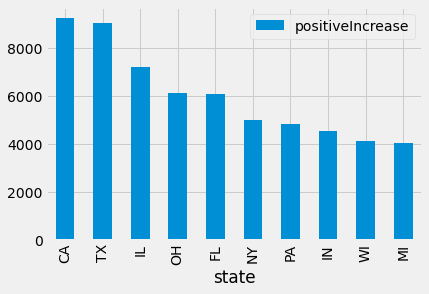

In [25]:
sorted_by_positive = covid.groupby('state').median().sort_values('positiveIncrease', ascending=False).reset_index()
sorted_by_positive.take(np.arange(10)).plot(kind='bar', x='state', y='positiveIncrease');

<!-- END QUESTION -->



Notice that many of the states that appear in this bar chart are large, highly populated states, like California and Texas. In order to get a more accurate view of the impact of COVID at the statewide level, we'll need to consider the population of each state alongside the raw number of positive test results.

<a id='part1_section4'></a>
### Section 4: Exponential Growth? 🚀

One thing that has caused great concern throughout the pandemic has been the potential for exponential spread of the virus. That's why we often hear health organizations like the Center for Disease Control and the World Health Organization advocating for people to stay at home early, before the growth of the virus swells out of control. I will figure out if the virus was spreading exponentially in the US during fall 2020 by using data visualization.

Here is a line graph showing the growth of the cumulative **total** number of positive cases in the US throughout the fall. The x-axis represents the days from October 1 to December 31 and the y-axis represents the total number of positive cases in the US recorded on or before each day.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_1
points: 1
manual: True
-->

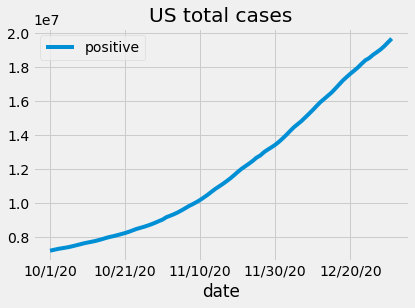

In [26]:
sorted_by_date = covid.groupby('date').sum().reset_index().sort_values('positive')
sorted_by_date.plot(kind='line', x='date', y='positive', title="US total cases");

<!-- END QUESTION -->



A line graph showing the number of **new** positive cases in the US each day throughout the fall. The x-axis represents the days from October 1 to December 31, and the y-axis represents the number of new positive cases recorded each day.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_2
points: 1
manual: True
-->

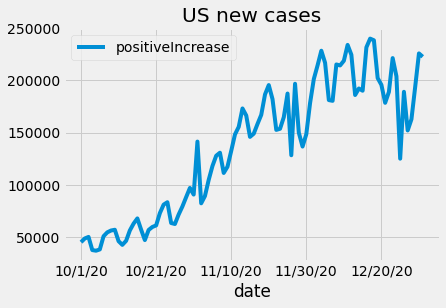

In [27]:
sorted_by_date_two = covid.groupby('date').sum().reset_index().sort_values('positive')
sorted_by_date_two.plot(kind='line', x='date', y='positiveIncrease', title="US new cases");

<!-- END QUESTION -->



From the plot above, we can see that the number of new cases seems to drop in late December; however, due to the large fluctuations throughout, it is hard to tell if there are any other periods in which the COVID situation was improving, with fewer new cases than before. 

To solve this problem, we introduce a *[rolling average](https://en.wikipedia.org/wiki/Moving_average)* to calculate the average number of new cases per day over a [seven-day period](https://gillingscovid19.unc.edu/definitions/7-day-average-of-new-cases), thereby smoothing out daily fluctuations and allowing us to see overall patterns more clearly. In the case of COVID-19, the rolling average is a critical tool to show [significant peaks and valleys over a period of time](https://www.georgiaruralhealth.org/blog/what-is-a-moving-average-and-why-is-it-useful/).


In [28]:
def rolling_average(array, window_size):
    """
    function to calculate rolling average 
    
    Parameters
    ----------
    array: array of data values 
    window_size: the number of data points to include in the rolling average

    Returns
    -------
    rolling_averages: array of rolling averages
    
    Examples
    --------
    >>> data = np.array([1,3,5,7,9])
    >>> rolling_average(data,2)
    [nan, 2.0, 4.0, 6.0, 8.0]
    
    >>> data = np.array([1,3,5,6,7,8,10])
    >>> rolling_average(data,3)
    [nan, nan, 3.0, 4.67, 6.0, 7.0, 8.33]
    """
    # Initialize an empty array to store rolling averages.
    rolling_averages = np.array([])

    for i in np.arange(len(array)):
        # Assign np.nan to the initial windows, until we have reached the window_size.
        if i < window_size-1:
            window_average = np.nan
        # Calculate the average of current window.
        else: 
            window_average = round(np.sum(array[i-window_size+1:i+1]) / window_size,2)

        # Store the average of current window in our array of rolling averages.
        rolling_averages = np.append(rolling_averages, window_average)
    return rolling_averages

In [29]:
def calculate_rolling(array):
    return rolling_average(array, 7)

In [30]:
increase_vals = covid.groupby(['month','day']).sum().reset_index().get('positiveIncrease').values
covid_roll = bpd.DataFrame().assign(
    positiveIncreaseRoll=calculate_rolling(increase_vals)
)
covid_roll

,positiveIncreaseRoll
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
87,179909.29
88,177670.00
89,178371.29
90,179009.71


I used the DataFrame `covid_roll` to plot a line graph showing the 7-day average of new cases in the US for each day throughout the fall. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_4
points: 1
manual: True
-->

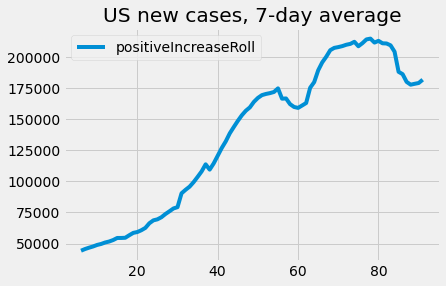

In [32]:
covid_roll.plot(kind='line',y='positiveIncreaseRoll', title="US new cases, 7-day average");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_5
points: 1
manual: True
-->

Based on the plot above covid cases increased in the span of ninety two days. The trends that we see from this graph is that there is an increases in new covid cases from day 1 to about day 56 and day 63 to day 83. The COVID cases tended to icnrease around November due to Thanksgiving Holidays and events such as the 2020 Presidential Election. However, the sharp decline in new cases towards the end of December can be attributed to the FDA's authorization of and the development of the COVID vaccine.

<!-- END QUESTION -->

I created a function called `state_trend` that creates a line plot similar to the one above, except for an individual state. The function takes as input the two-letter postal code abbreviation for a state and generate the line plot showing that state's seven-day rolling average of new cases, throughout the fall. 

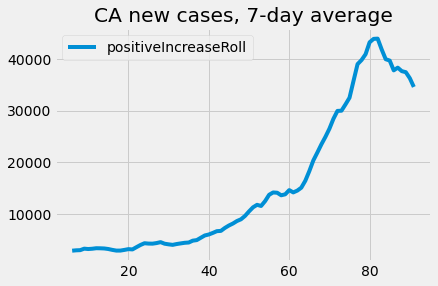

In [33]:
# Define your function here.
def state_trend(state):
    sorted_df = covid[covid.get('state') == state]
    increase_vals = sorted_df.groupby(['month','day']).sum().reset_index().get('positiveIncrease').values
    covid_roll = bpd.DataFrame().assign(
        positiveIncreaseRoll=calculate_rolling(increase_vals)
    )
    covid_roll.plot(kind='line',y='positiveIncreaseRoll', title=state + " new cases, 7-day average");

# Test out your function here. Try a few different states!
state_trend('CA')

The 7-day average number of new cases in Wyoming (WY) was highest around mid-November.

<a id='part1_section5'></a>
### Section 5: Weekdays vs. Weekends 👔 🆚 🏄
 
In this section, we'll look for patterns involving days of the week. For instance, how does the number of tests on the weekends compare to the number of tests on weekdays? Are there certain days of the week that are more popular for testing, or even days where more patients are hopitalized or dying? Let's find out!

`day_of_week` which takes in the date, as a string formatted as month/day/year, and outputs a string indicating the day of the week, for example "Sunday" or "Monday".  

In [36]:
# Define your function here.
def day_of_week(date):
    new_date = datetime.datetime.strptime(date, '%m/%d/%y')
    day = new_date.weekday()
    if (day == 0):
        return 'Monday'
    elif (day == 1):
        return 'Tuesday'
    elif (day == 2):
        return "Wednesday"
    elif (day == 3):
        return 'Thursday'
    elif (day == 4):
        return 'Friday'
    elif (day == 5):
        return 'Saturday'
    else:
        return 'Sunday'

# Test out your function here. Try a few different dates, 
# and look at a calendar to make sure your function is working correctly.
day_of_week('10/01/20')

'Thursday'

A newDataFrame called `covid_days` with the same information as `covid`, plus two additional columns:
1. `'dayOfWeek'`: A column containing the corresponding day of the week for each date (such as "Sunday" or "Monday"). 
2. `'isWeekend'`: A column containing boolean values, with `True` corresponding to a weekend day (Saturday or Sunday) and `False` corresponding to any other day.

In [38]:
def isWeekend(date):
    if ((day_of_week(date) == 'Saturday') | (day_of_week(date) == 'Sunday')):
        return True
    else:
        return False

covid_days = covid.assign(
    dayOfWeek=covid.get('date').apply(day_of_week),
    isWeekend=covid.get('date').apply(isWeekend)
)
covid_days

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,month,day,dayOfWeek,isWeekend
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658,12,31,Thursday,False
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750,12,31,Thursday,False
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299,12,31,Thursday,False
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190,12,31,Thursday,False
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406,12,31,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007,10,1,Thursday,False
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843,10,1,Thursday,False
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474,10,1,Thursday,False
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020,10,1,Thursday,False


1. `weekday_pos_avg`: The average number of new positive tests per weekday, throughout the US.
2. `weekend_pos_avg`: The average number of new positive tests per weekend day, throughout the US.

In [40]:
weekday_pos_avg = covid_days[covid_days.get('isWeekend') == False].get('positiveIncrease').mean()
weekday_pos_avg

2713.0121806298275

In [42]:
weekend_pos_avg = covid_days[covid_days.get('isWeekend') == True].get('positiveIncrease').mean()
weekend_pos_avg

2565.318250377074

What we can you conclude, based on the data, about the difference in weekend and weekday tests is nothing because we do not have enough information.

I will now investigate which day of the week has the largest proportion of positive tests. I have create a DataFrame indexed by `'dayOfWeek'`, with just one column called `'proportionPositive'` that contains the proportion of all tests recorded on that day of the week (`'totalTestResultsIncrease'`) that had a positive result (`'positiveIncrease'`). The DataFrame will be sorted in descending order of `'proportionPositive'` and will be saved as `positives_by_day`.

In [46]:
sorted_by_day = covid_days.groupby('dayOfWeek').sum().reset_index()
positives_by_day = bpd.DataFrame().assign(
    dayOfWeek=sorted_by_day.get('dayOfWeek'),
    proportionPositive=sorted_by_day.get('positiveIncrease')/sorted_by_day.get('totalTestResultsIncrease')
).set_index('dayOfWeek').sort_values(by='proportionPositive',ascending=False)
positives_by_day

,proportionPositive
dayOfWeek,
Wednesday,0.123501
Thursday,0.119674
Tuesday,0.113809
Sunday,0.112519
Friday,0.109996
Saturday,0.107396
Monday,0.094588


In order to visualize the data in the `positives_by_day` DataFrame I will use a barplot.

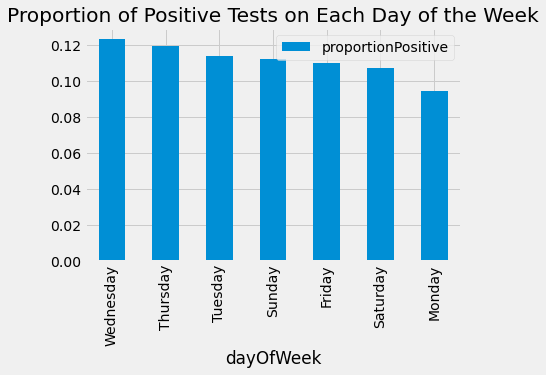

In [48]:
positives_by_day.plot(kind='bar', title='Proportion of Positive Tests on Each Day of the Week');

Unfortunately, this bar chart fails to capture something important, which is that the categories (the days of the week) are inherently ordered. It would be more meaningful to see this bar chart with the bars arranged not in descending order of proportions, but in chronological order of days of the week: "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday".

I defined the variable `chronological_proportions` such that the cell below produces the same bar chart as above, except with the bars arranged in chronological order. 

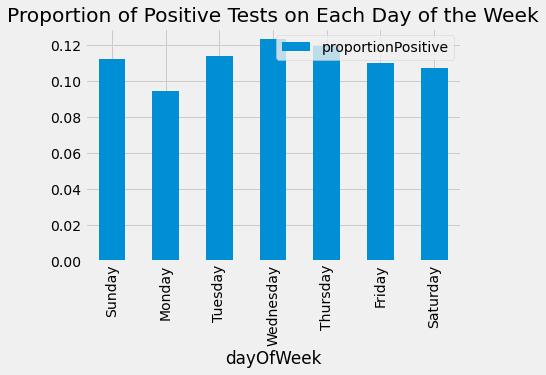

In [49]:
chronological_days = np.array(['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])

chronological_proportions = np.array([0.112519, 0.094588, 0.113809, 0.123501, 0.119674, 0.109996, 0.107396])

chronological_df = bpd.DataFrame().assign(
    dayOfWeek = chronological_days,
    proportionPositive = chronological_proportions
).set_index('dayOfWeek')

chronological_df.plot(kind='bar', title='Proportion of Positive Tests on Each Day of the Week');

If you need to get COVID tested weekly at a place that provides instant results, you should make a habit of getting your tests done on Mondays, since your chances of getting a positive test result are less if you test on that day is a false statement.

There certainly seem to be noticeable weekend/weekday differences for COVID tests. Now let's see if there are similar weekend/weekday differences for hospitalizations and deaths.

DataFrame called `hosp_deaths`, indexed by month and day, containing three columns:
1. `'hospitalizedIncrease'`: The total number of new hospitalizations recorded on that day, throughout the entire US.
2. `'deathIncrease'`: The total number of new deaths recorded on that day, throughout the entire US.
3. `'isWeekend'`: `True` for a weekend day (Saturday or Sunday) and `False` otherwise.

In [53]:
def isWeekend_Two(value):
    if (value == 0):
        return False
    else:
        return True

indexed_by_md = covid_days.groupby(['month', 'day']).sum()
hosp_deaths = bpd.DataFrame().assign(
    hospitalizedIncrease=indexed_by_md.get('hospitalizedIncrease'),
    deathIncrease=indexed_by_md.get('deathIncrease'),
    isWeekend=indexed_by_md.get('isWeekend').apply(isWeekend_Two)
)
hosp_deaths
hosp_deaths

hospitalizedIncrease  deathIncrease  isWeekend
month day                                                
10    1                    1757            858      False
      2                    1443            833      False
      3                    1088            729       True
      4                     663            374       True
      5                    1447            319      False
...                         ...            ...        ...
12    27                   2302           1384       True
      28                   3723           1479      False
      29                   5261           3285      False
      30                   5514           3876      False
      31                   4348           3277      False

[92 rows x 3 columns]

In [55]:
Hosp = hosp_deaths.groupby('isWeekend').sum()
Hosp

,hospitalizedIncrease,deathIncrease
isWeekend,,
False,228848,107828
True,55813,28976


In [56]:
Hosp.get('hospitalizedIncrease').values[0]

228848

In [57]:
Hosp.get('hospitalizedIncrease').values[1]

55813

In [124]:
((Hosp.get('hospitalizedIncrease').values[0] / Hosp.get('hospitalizedIncrease').values[1])-1) *100

310.02633794994

In [59]:
#410% increase in hospitalization on the weedays vs. the weekend

This line plot shows the daily trends of nationwide hospitalizations and deaths

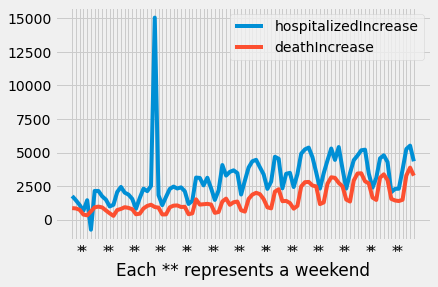

In [60]:
hosp_deaths.plot(kind='line')

# Don't edit this part below; simply run it; this code is labeling weekends on the x-axis with **.
weekends = hosp_deaths.get('isWeekend').values.astype(int).astype(str)
weekends = np.where(weekends == '0', '', weekends)
weekends = np.where(weekends != '', '*', weekends)
plt.xticks(np.arange(len(weekends)), weekends);
plt.xlabel('Each ** represents a weekend');

Do people tend to avoid dying on the weekend? Probably not. More likely, the wavy pattern is a byproduct of imperfect data keeping - weekend deaths tend to be reported during the week, when more hospital staff are working. 

The large spike in the hospitalization data is also an anomaly, likely an error in the data.

<a id='part1_section6'></a>
### Section 6: Rates Per 100,000 People 👩‍🦱👦🏾🧑👩🏿‍🦰👩🏽‍🦱🧔👱‍

Without knowing the population of each state, purely comparing the number of positive tests gives a very biased impression of which states are faring better in their battle against the coronavirus. For example, populous states like California and Texas are likely to have more positive tests than states like Wyoming and Vermont, simply because they have far more people. In order to fairly compare states with different populations, we need to look at proportions, or rates. 

In this section, I will use another data set of estimated state populations to add some perspective to the COVID-19 numbers you have seen so far. The population data comes from the [U.S. Census Bureau's Annual Estimates of the Resident Population for the United States, Regions, States, and the District of Columbia: April 1, 2020 to July 1, 2021](https://data.census.gov/cedsci/table?tid=PEPPOP2021.NST_EST2021_POP&hidePreview=false). I will use their annual estimates for July 1, 2020.

Population data located at `data/census_data.csv`.

In [61]:
census_data = bpd.read_csv('data/census_data.csv')
census_data

,state,population
0,Oklahoma,3962031
1,Nebraska,1961455
2,Hawaii,1451911
3,South Dakota,887099
4,Tennessee,6920119
...,...,...
46,Wisconsin,5892323
47,Alabama,5024803
48,West Virginia,1789798
49,Rhode Island,1096229


The first thing you might notice is that in this data set, states are given by their full name, instead of their two-letter postal code abbreviation. Let's address this mismatch in our two different data sources. To do that, I will need a way of converting between state name and postal code. For that, I'll introduce yet another data set, this one from the [US Postal Service](https://pe.usps.com/text/pub28/28apb.htm). 

The data is in `data/postal_codes.csv`.

In [62]:
postal_codes = bpd.read_csv('data/postal_codes.csv')
postal_codes

,State/Possession,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
...,...,...
54,Virginia,VA
55,Washington,WA
56,West Virginia,WV
57,Wisconsin,WI


Notice that this DataFrame has more rows, because in addition to the 50 states and the District of Columbia, this data set also includes US territories, like American Samoa (AS) and Guam (GU).

The function called `to_postal_code` that takes as input the name of a US state or territory, and returns the two-letter postal code abbreviation. Then function `to_name` that takes as input the two-letter postal code of a US state or territory, and returns its name. 

In [63]:
# Define your functions here.
def to_postal_code(name):
    return postal_codes[postal_codes.get('State/Possession') == name].get('Abbreviation').values[0]
def to_name(code):
    return postal_codes[postal_codes.get('Abbreviation') == code].get('State/Possession').values[0]

# Test out your functions here. Try a few different examples!
to_postal_code('Maryland'), to_name('GU')

('MD', 'Guam')

DataFrame called `begin_cases` that has 51 rows (one for each state plus DC) and contains four columns:

1. `'state'`: The two-letter postal code abbreviation for the state.
2. `'population'`: The population of the state.
3. `'beginPositive'`: The total number of positive COVID-19 tests recorded for that state, as of October 1, 2020.
4. `'beginPositiveRate'`: As of October 1, 2020, the total number of positive tests per 100,000 people for that state.


In [65]:
begin_cases = bpd.DataFrame().assign(
    state=census_data.get('state').apply(to_postal_code),
    population=census_data.get('population')
)
october_first = covid_days[covid_days.get('date') == '10/1/20']
positive_data = october_first.groupby('state').sum().reset_index()
begin_cases = begin_cases.merge(positive_data, left_on='state', right_on='state')

proportion_rate = begin_cases.get('population')

begin_cases = begin_cases.assign(
    beginPositive=begin_cases.get('positive'),
    beginPositiveRate=(begin_cases.get('positive') / begin_cases.get('population')) * 100000
).get(['state','population','beginPositive','beginPositiveRate'])
begin_cases

,state,population,beginPositive,beginPositiveRate
0,OK,3962031,88369,2230.396481
1,NE,1961455,45564,2322.969428
2,HI,1451911,12589,867.064166
3,SD,887099,23136,2608.051638
4,TN,6920119,197432,2853.014522
...,...,...,...,...
46,WI,5892323,132123,2242.290519
47,AL,5024803,155744,3099.504597
48,WV,1789798,16024,895.296564
49,RI,1096229,24914,2272.700321


I used `begin_cases`, to identify the state that had the highest number of positive tests per 100,000 people, as of **October 1** then stored the two-letter postal code abbreviation of that state in variable `begin_highest`.

In [67]:

begin_highest = begin_cases.sort_values(by='beginPositiveRate').iloc[-1].get('state')
begin_highest
begin_highest

'LA'

Let's see if this state was able to improve upon its numbers throughout the fall:

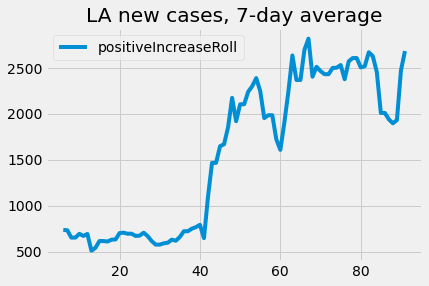

In [69]:
state_trend(begin_highest)

**Question 6.4.** I will be repeating the above proccess, except I will use the end of the given time period instead of the beginning. The DataFrame `end_cases`, with columns `'state'`, `'population'`, `'endPositive'`, and `'endPositiveRate'`. Then my goal will be to find the state that had the highest total number of positive tests per 100,000 people, as of **December 31**. I will store the two-letter postal code abbreviation of that state in variable `end_highest`.

In [70]:
end_highest = end_cases = bpd.DataFrame().assign(
    state=census_data.get('state').apply(to_postal_code),
    population=census_data.get('population')
)
october_first = covid_days[covid_days.get('date') == '12/31/20']
positive_data = october_first.groupby('state').sum().reset_index()
end_cases = end_cases.merge(positive_data, left_on='state', right_on='state')

proportion_rate = end_cases.get('population')

end_cases = end_cases.assign(
    endPositive=end_cases.get('positive'),
    endPositiveRate=(end_cases.get('positive') / end_cases.get('population')) * 100000
).get(['state','population','endPositive','endPositiveRate'])

end_highest = end_cases.sort_values(by='endPositiveRate').iloc[-1].get('state')
end_highest
end_highest

'ND'

Let's see what happened in this state throughout the fall.

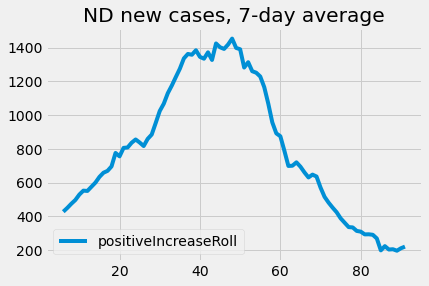

In [72]:
state_trend(end_highest)

<a id='part1_section7'></a>
### Section 7: Mask Mandates 😷

It has long been advocated by public health experts, including the World Health Organization and the Center for Disease Control, that wearing a mask can prevent the spread of COVID-19. I would like to see how this plays out in our data, using a dataset of which states have had state-wide mask mandates and which dates they were in effect. This data comes from an article by [U.S. News and World Report](https://www-usnews-com.cdn.ampproject.org/v/s/www.usnews.com/news/best-states/articles/these-are-the-states-with-mask-mandates?amp_js_v=a6&amp_gsa=1&context=amp&usqp=mq331AQHKAFQArABIA%3D%3D#aoh=16110233502761&referrer=https%3A%2F%2Fwww.google.com&amp_tf=From%20%251%24s&ampshare=https%3A%2F%2Fwww.usnews.com%2Fnews%2Fbest-states%2Farticles%2Fthese-are-the-states-with-mask-mandates) and some webscraping for missing information.

First, as of April 12, 2022, all states in the United States have gotten rid of mask mandates though many states still recommend wearing a mask in indoor settings where social distancing is not possible.

Second, the mandate end date in the dataset is the date when indoor masking for **vaccinated individuals** was no longer required.

Lastly, as the article points out, the details of the mask mandate differed from state to state. There were states that did not issue a state-wide mandate but allowed for individual counties and cities to do so. Some states banned individual counties and cities from implementing a mandate at all. In states that had mandates, they applied in different situations: public transportation, schools, etc. The dataset does not capture such detailed information on the mandates.

The data is located at `data/mask_mandate.csv`. 

In [73]:
mask_mandate = bpd.read_csv('data/mask_mandate.csv')
mask_mandate

,state,mandate,mandate_start,mandate_end
0,AL,True,2020-07-16,2021-04-09
1,AK,False,NaN,NaN
2,AZ,False,NaN,NaN
3,AR,True,2020-07-20,2021-03-30
4,CA,True,"2020-06-18,2021-12-15","2021-06-15,2022-02-16"
...,...,...,...,...
46,VA,True,2020-05-29,2021-05-14
47,WA,True,"2020-06-26,2021-08-23","2021-05-13,2022-03-12"
48,WV,True,2020-11-14,2021-05-14
49,WI,True,2020-08-01,2021-03-31


For each state, there is a column containing boolean values corresponding to whether there ever was a mask mandate in that state. For those that did have a mandate at some point, we record the start date and end date of the mandate. For states that reinstated a mask mandate amidst the Omicron variant surge, there are two start and end dates, separated by a comma. 

Currently, the `'mandate_start'` and `'mandate_end'` columns contain strings, which are not very useful. For example, the string in the mandate_start column for California (CA) is `'2020-06-18,2021-12-15'`. I'll separate that into two strings, one for each date.

*The DataFrame called  `mask_list` has a row for all 50 states plus the District of Columbia (DC). It should have four columns:

1. `'state'`: The state's two-letter postal code abbreviation. 
2. `'mandate'`: A boolean, `True` if the state ever had a mask mandate, `False` otherwise.
3. `'start'`: A list of date strings for mask mandate start dates. Each date string should be formatted as YYYY-MM-DD.
4. `'end'`: A list of date strings for mask mandate end dates. Each date string should be formatted as YYYY-MM-DD.

In [74]:
mask_list = mask_list = bpd.DataFrame().assign(
    state=mask_mandate.get('state'),
    mandate=mask_mandate.get('mandate'),
    start=mask_mandate.get('mandate_start').str.split(','),
    end=mask_mandate.get('mandate_end').str.split(',')
)
mask_list
mask_list

,state,mandate,start,end
0,AL,True,[2020-07-16],[2021-04-09]
1,AK,False,NaN,NaN
2,AZ,False,NaN,NaN
3,AR,True,[2020-07-20],[2021-03-30]
4,CA,True,"[2020-06-18, 2021-12-15]","[2021-06-15, 2022-02-16]"
...,...,...,...,...
46,VA,True,[2020-05-29],[2021-05-14]
47,WA,True,"[2020-06-26, 2021-08-23]","[2021-05-13, 2022-03-12]"
48,WV,True,[2020-11-14],[2021-05-14]
49,WI,True,[2020-08-01],[2021-03-31]


I want to figure out the total number of days that each state's mask mandate was in effect. To do that, I will revisit the `date` object from `datetime`. 

While I could calculate the difference between two dates manually, it is easier to subtract using `date` objects. 

The dates in the `'start'` and `'end'` columns of `mask_list` are in what is called an **[ISO 8601](https://en.wikipedia.org/wiki/ISO_8601)** format (YYYY-MM-DD).

Fortunately, `datetime` has a method, `fromisoformat`, that converts ISO 8601 format dates to `date` objects. Here's an example:

In [76]:
iso_april_fools = datetime.date.fromisoformat('2022-04-01')
iso_april_fools

datetime.date(2022, 4, 1)

Calculating the number of days between two dates: subtract the two `date` objects, just like we'd subtract `int`s or `float`s. For example, the time between *April 1st, 2021* and *April 1st, 2022* should be 365 days. 

In [77]:
april_fools_2021 = datetime.date.fromisoformat('2021-04-01')
april_fools_2022 = datetime.date.fromisoformat('2022-04-01')

diff = april_fools_2022 - april_fools_2021
diff

datetime.timedelta(days=365)

This says that there are 365 days between these two dates, but instead of just giving the `int` 365, subtracting two `date` objects produces something called a ```timedelta``` object. We can extract the information we want (the number of days between two ```date``` objects) by using the ```days``` attribute (not a function!) on the ```timedelta``` object.

In [78]:
diff.days

365

This produces a regular old `int`, which we can work with.

The function called ```calc_duration``` that takes in two lists of date strings of the same length, ```start``` and ```end```, and calculates the total number of days between each pair of corresponding start and end dates in the lists. Here are some example inputs and expected outputs for the function:

```python
>>> calc_duration(['2022-04-01'], ['2022-04-12'])
11
>>> calc_duration(['2021-04-01', '2022-04-01'], ['2022-04-01', '2022-04-12'])
376
```

In [79]:
def calc_duration(start, end):
    list_len = len(start)
    total = 0
    for i in np.arange(0,list_len):
        new_start = datetime.date.fromisoformat(start[i])
        new_end = datetime.date.fromisoformat(end[i])
        diff = new_end - new_start
        total += (diff.days)
    return total

Before I use the `calc_duration` function on our `mask_list` data, there are rows where `'start'` and `'end'` are missing (the `NaN` values). These `NaN`s are `np.NaN` objects, objects that exist in `numpy` specifically for missing data. I don't know how to deal with missing values yet (it's covered in DSC 80), so let's just work with states that had a mask mandate at some point.

I will filter the `mask_list` DataFrame so that it just includes the states that have had mask mandates during the pandemic and save the result as `had_mandate`.

In [81]:
had_mandate = had_mandate = mask_list[mask_list.get('mandate') == True]
had_mandate
had_mandate

,state,mandate,start,end
0,AL,True,[2020-07-16],[2021-04-09]
3,AR,True,[2020-07-20],[2021-03-30]
4,CA,True,"[2020-06-18, 2021-12-15]","[2021-06-15, 2022-02-16]"
5,CO,True,[2020-07-20],[2021-05-14]
6,CT,True,[2020-04-20],[2022-02-28]
...,...,...,...,...
46,VA,True,[2020-05-29],[2021-05-14]
47,WA,True,"[2020-06-26, 2021-08-23]","[2021-05-13, 2022-03-12]"
48,WV,True,[2020-11-14],[2021-05-14]
49,WI,True,[2020-08-01],[2021-03-31]


In order to `apply` our `calc_duration` to the data in this DataFrame, I need to use values from two different columns, which is something I haven't learned yet. I have therefore implemented the code to `apply` the `calc_duration` function. The DataFrame below, called `mask_duration`, has an additional column containing the output of the `calc_duration` function for each row, or the total length of all mask mandates in each state that had a mask mandate.

In [83]:
mask_duration = had_mandate.assign(duration=had_mandate.apply(lambda x: calc_duration(x['start'], x['end']), axis=1))
mask_duration

,state,mandate,start,end,duration
0,AL,True,[2020-07-16],[2021-04-09],267
3,AR,True,[2020-07-20],[2021-03-30],253
4,CA,True,"[2020-06-18, 2021-12-15]","[2021-06-15, 2022-02-16]",425
5,CO,True,[2020-07-20],[2021-05-14],298
6,CT,True,[2020-04-20],[2022-02-28],679
...,...,...,...,...,...
46,VA,True,[2020-05-29],[2021-05-14],350
47,WA,True,"[2020-06-26, 2021-08-23]","[2021-05-13, 2022-03-12]",522
48,WV,True,[2020-11-14],[2021-05-14],181
49,WI,True,[2020-08-01],[2021-03-31],242


To explore the connection between COVID cases and mask mandates, we need to look at the COVID data again. We'll look at the ```begin_cases``` and `end_cases` DataFrames in particular. These DataFrames contain information about the total number of positive cases in each state, and the rate per 100,000 people, at the beginning of fall 2020 (October 1) and the end of fall 2020 (December 31). 

In [84]:
begin_cases

,state,population,beginPositive,beginPositiveRate
0,OK,3962031,88369,2230.396481
1,NE,1961455,45564,2322.969428
2,HI,1451911,12589,867.064166
3,SD,887099,23136,2608.051638
4,TN,6920119,197432,2853.014522
...,...,...,...,...
46,WI,5892323,132123,2242.290519
47,AL,5024803,155744,3099.504597
48,WV,1789798,16024,895.296564
49,RI,1096229,24914,2272.700321


In [85]:
end_cases

,state,population,endPositive,endPositiveRate
0,OK,3962031,290936,7343.102565
1,NE,1961455,165297,8427.264454
2,HI,1451911,21832,1503.673435
3,SD,887099,99164,11178.459225
4,TN,6920119,586802,8479.651867
...,...,...,...,...
46,WI,5892323,520438,8832.475749
47,AL,5024803,361226,7188.858946
48,WV,1789798,85334,4767.800612
49,RI,1096229,89541,8168.092616


I want to combine the rates from these DataFrames with the mask mandate durations from the `mask_duration` DataFrame. I have created a new DataFrame called ```rate_duration``` that has a row for all 50 states plus the District of Columbia, and the following columns:

1. ```'state'```: The state abbreviation.
2. ```'beginPositiveRate'```: As of October 1, 2020, the total number of positive tests per 100,000 people for that state.
3. `'endPositiveRate'`: As of December 31, 2020, the total number of positive tests per 100,000 people for that state.
4. ```'duration'```: Total number of days that a mask mandate was in effect for that state. 

In [86]:
rate_duration = (begin_cases
 .merge(mask_duration, how='left', on='state')
 .merge(end_cases, on='state')
 .get(['state', 'beginPositiveRate', 'endPositiveRate', 'duration'])
)
rate_duration

,state,beginPositiveRate,endPositiveRate,duration
0,OK,2230.396481,7343.102565,NaN
1,NE,2322.969428,8427.264454,NaN
2,HI,867.064166,1503.673435,495.0
3,SD,2608.051638,11178.459225,NaN
4,TN,2853.014522,8479.651867,NaN
...,...,...,...,...
46,WI,2242.290519,8832.475749,242.0
47,AL,3099.504597,7188.858946,267.0
48,WV,895.296564,4767.800612,181.0
49,RI,2272.700321,8168.092616,428.0


Since the `rate_duration` DataFrame includes states that never had a mask mandate, the missing values, recorded as ```NaN```, are back again. But we know that states that never had a mask mandate had 0 days of mask mandate. Let's fix that.

The DataFrame called `complete_mandate` that is exactly the same as `rate_duration`, except the `'duration'` column should have `NaN` values replaced with 0s.

*Note:* ```Numpy``` has a function ```np.isnan()``` that takes in an object and returns `True` if it is a ```np.NaN``` object, `False` otherwise. You cannot check whether a variable `x` is ```np.NaN``` using the `==` symbol such as, 

```python
>>> x == np.NaN
False
```
as it will evaluate to `False` even if ```x``` is actually a ```np.NaN``` object.

Instead, use the ```np.isnan()``` function:

```python
>>> np.isnan(x)
True
```

In [87]:
 def isNan(value):
    if (np.isnan(value)):
        return 0
    else:
        return value

complete_mandate = rate_duration.assign(
    duration=rate_duration.get('duration').apply(isNan)
)
complete_mandate
complete_mandate

,state,beginPositiveRate,endPositiveRate,duration
0,OK,2230.396481,7343.102565,0.0
1,NE,2322.969428,8427.264454,0.0
2,HI,867.064166,1503.673435,495.0
3,SD,2608.051638,11178.459225,0.0
4,TN,2853.014522,8479.651867,0.0
...,...,...,...,...
46,WI,2242.290519,8832.475749,242.0
47,AL,3099.504597,7188.858946,267.0
48,WV,895.296564,4767.800612,181.0
49,RI,2272.700321,8168.092616,428.0


In [89]:
duration_0 = complete_mandate[complete_mandate.get('duration') == 0.0]
duration_0

,state,beginPositiveRate,endPositiveRate,duration
0,OK,2230.396481,7343.102565,0.0
1,NE,2322.969428,8427.264454,0.0
3,SD,2608.051638,11178.459225,0.0
4,TN,2853.014522,8479.651867,0.0
11,MO,2078.355592,6378.604467,0.0
...,...,...,...,...
25,GA,2977.251114,5283.298216,0.0
34,ID,2275.605432,7569.332147,0.0
39,FL,3248.049183,6029.356050,0.0
44,AZ,3053.948559,7247.255707,0.0


In [90]:
duration_Zero = bpd.DataFrame().assign(
    duration_none = duration_0.get('endPositiveRate') - duration_0.get('beginPositiveRate')
)
duration_Zero

,duration_none
0,5112.706084
1,6104.295026
3,8570.407587
4,5626.637345
11,4300.248876
...,...
25,2306.047101
34,5293.726715
39,2781.306867
44,4193.307148


In [91]:
duration = complete_mandate[complete_mandate.get('duration') != 0]
duration

,state,beginPositiveRate,endPositiveRate,duration
2,HI,867.064166,1503.673435,495.0
5,NV,2582.150503,7216.630578,517.0
6,NM,1400.711949,6746.613801,544.0
7,IA,2716.932990,7500.715816,82.0
8,KS,2035.130864,7576.365519,272.0
...,...,...,...,...
45,UT,2256.463450,8428.965129,152.0
46,WI,2242.290519,8832.475749,242.0
47,AL,3099.504597,7188.858946,267.0
48,WV,895.296564,4767.800612,181.0


In [92]:
Complete_Mandate = bpd.DataFrame().assign(
    durations = duration.get('endPositiveRate') - duration.get('beginPositiveRate')
)
Complete_Mandate

,durations
2,636.609269
5,4634.480074
6,5345.901851
7,4783.782826
8,5541.234655
...,...
45,6172.501679
46,6590.185229
47,4089.354349
48,3872.504048


In [93]:
total_covid_rates_for_states_with_mask_mandate = Complete_Mandate.get('durations').values.mean()
total_covid_rates_for_states_with_mask_mandate

4027.288437248552

In [94]:
total_covid_rates_for_states_without_mask_mandate = duration_Zero.get('duration_none').values.mean()
total_covid_rates_for_states_without_mask_mandate

4772.930516726859

In [95]:
((total_covid_rates_for_states_without_mask_mandate / total_covid_rates_for_states_with_mask_mandate) - 1)* 100

18.51474239048374

Now that the ```'duration'``` column is all numerical, we can do some data visualization.

I have created a scatter plot showing the relationship between each state's total duration of mask mandates and the *change* (increase) in the total number of positive tests per 100,000 people between October 1 and December 31. In the plot, the x-axis should represent the total number of days the mask mandates were in effect and the y-axis represents the increase in the total number of positive tests per 100,000 people during fall 2020.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q7_5
points: 1
manual: True
-->

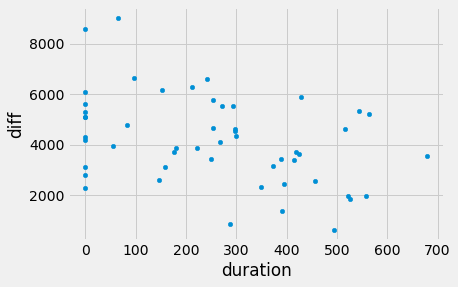

In [96]:

# Make your plot here.
new_df= complete_mandate.assign(
    diff=complete_mandate.get('endPositiveRate') - complete_mandate.get('beginPositiveRate'),
)
new_df.plot(kind='scatter', x='duration', y='diff');

<!-- END QUESTION -->



There should be a pretty clear negative association here, showing that the states with longer-lasting mask mandates had fewer new positive cases from October 1, 2020 to December 31, 2020. Of course, some of the mask mandates lasted a lot longer than the time period covered here, which was only 92 days. Therefore, it's not the fact that certain states had mandates lasting hundreds of days that *caused* fewer new positive cases from October 1, 2020 to December 31, 2020, as most of those long-lasting mandates hadn't even happened yet! Rather, a likely confounding factor is that the states that imposed and tolerated long-lasting mandates are the same states where residents were being cautious about gathering in groups, were wearing masks in fall 2020, and were generally following public health directives. 

Let's conclude this section by looking at the state level to see if the relationship between the imposition of mask mandates and the spread of the virus in particular states. Iowa, for example, instituted a mask mandate on November 17, right in middle of the time period we are looking at. 

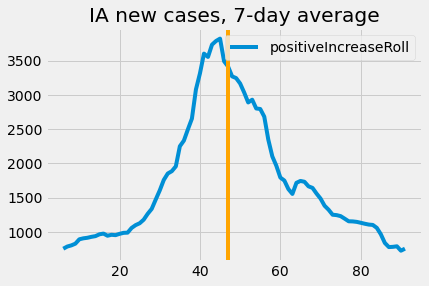

In [97]:
state_trend('IA') 

# This code creates an orange line showing when the mask mandate went into effect. You can ignore this code.
IA_idx = list(covid[covid.get('state')=='IA'].groupby(['month', 'day']).sum().index).index((11, 17))
plt.axvline(IA_idx, color = 'orange');

North Dakota implemented their mask mandate right around the same time, on November 14, and the trend there is similar.

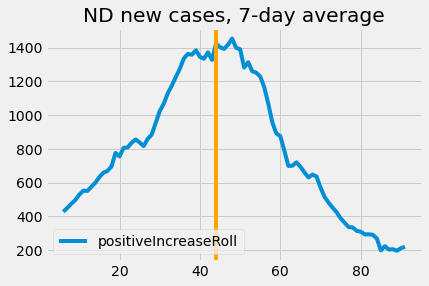

In [98]:
state_trend('ND') 

# This code creates an orange line showing when the mask mandate went into effect. You can ignore this code.
ND_idx = list(covid[covid.get('state')=='ND'].groupby(['month', 'day']).sum().index).index((11, 14))
plt.axvline(x = ND_idx, color = 'orange');

These graphs certainly seem to suggest that there may be a causal link between mask mandates and improved COVID outcomes, but since we're not looking at a randomized controlled trial, we can't say for certain. In Iowa, for example cases were already trending down when the mandate went into effect, so the cases might have continued to decline either way. As you may know from following the news, the effectiveness of masks and the imposition of mask mandates can be a highly contentious topic that tends to polarize people along political lines.  

<a id='part1_section8'></a>
### Section 8: Political Parties 🐘 🐎

As the pandemic has dragged on, we've seen how COVID has become a very political issue fueling lots of debate. In this section, we'll explore how COVID outcomes relate to political affiliation, on a statewide level. We'll address the question of whether COVID has affected Democratic and Republican states equally.

In this section, we'll work with two different datasets. I have cleaned up the data by handling missing values, correcting data entry errors, and renaming columns. Our first dataset contains the political party of each state's governor ([source](https://github.com/CivilServiceUSA)). The next contains information on the [popular vote](https://en.wikipedia.org/wiki/United_States_presidential_election#Popular_vote) for the 2020 presidential election, obtained from the [Cook Political Report](https://www.cookpolitical.com/2020-national-popular-vote-tracker). For each state plus Washington, D.C., this dataset records the number of voters who cast their ballots for Joe Biden (the Democratic candidate), for Donald Trump (the Republican candidate), and for some other candidate. 

In [99]:
governors = bpd.read_csv('data/governors.csv')
governors

,state,govParty
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democratic
...,...,...
45,Virginia,Democratic
46,Washington,Democratic
47,West Virginia,Democratic
48,Wisconsin,Democratic


In [100]:
popular_vote = bpd.read_csv('data/popular_vote.csv')
popular_vote

,state,dem_votes,rep_votes,other_votes
0,Arizona,1672143,1661686,53497
1,Florida,5297045,5668731,101680
2,Georgia,2473633,2461854,62229
3,Iowa,759061,897672,34138
4,Michigan,2804040,2649852,85410
...,...,...,...,...
46,Vermont,242820,112704,11904
47,Virginia,2413568,1962430,84526
48,Washington,2369612,1584651,133368
49,West Virginia,235984,545382,13286


To start I have added a new column to the `popular_vote` DataFrame called `'popParty'` that contains the string "Democratic" or the string "Republican", corresponding to whichever party won more votes in that state during the 2020 presidential election. 

In [101]:
def party(state):
    dem_votes = popular_vote[popular_vote.get('state') == state].iloc[0].get('dem_votes')
    rep_votes = popular_vote[popular_vote.get('state') == state].iloc[0].get('rep_votes')
    if (dem_votes > rep_votes):
        return "Democratic"
    else:
        return "Republican"

popular_vote = popular_vote.assign(
    popParty=popular_vote.get('state').apply(party)
)
popular_vote

,state,dem_votes,rep_votes,other_votes,popParty
0,Arizona,1672143,1661686,53497,Democratic
1,Florida,5297045,5668731,101680,Republican
2,Georgia,2473633,2461854,62229,Democratic
3,Iowa,759061,897672,34138,Republican
4,Michigan,2804040,2649852,85410,Democratic
...,...,...,...,...,...
46,Vermont,242820,112704,11904,Democratic
47,Virginia,2413568,1962430,84526,Democratic
48,Washington,2369612,1584651,133368,Democratic
49,West Virginia,235984,545382,13286,Republican


Now we will combine this political data with the COVID data we've compiled in the `complete_mandate` DataFrame from Section 7. This will allow us to address the question of how COVID outcomes differed in states with different political leanings.

The DataFrame called `covid_politics` that has one row for each of the 50 US states (not including Washington, D.C.) and contains four columns:

1. `'state'`: The full name of the state.
3. `'endPositiveRate'`: As of December 31, 2020, the total number of positive tests per 100,000 people for that state.
4. `'govParty'`: The political party of the state's governor.
5. `'popParty'`: The political party that was more popular among voters in the 2020 presidential election.

In [103]:
with_mandate = complete_mandate.assign(
    state=complete_mandate.get('state').apply(to_name)
)
covid_politics = popular_vote.merge(with_mandate, on='state')
covid_politics = covid_politics.merge(governors, on='state').get(['state','endPositiveRate','govParty','popParty'])
covid_politics

,state,endPositiveRate,govParty,popParty
0,Arizona,7247.255707,Republican,Democratic
1,Florida,6029.356050,Republican,Republican
2,Georgia,5283.298216,Republican,Democratic
3,Iowa,7500.715816,Republican,Republican
4,Michigan,5250.681787,Democratic,Democratic
...,...,...,...,...
45,Vermont,1153.627655,Republican,Democratic
46,Virginia,4049.840339,Democratic,Democratic
47,Washington,3139.483740,Democratic,Democratic
48,West Virginia,4767.800612,Democratic,Republican


I have now create a DataFrame called `republican_governors` with the same columns as `covid_politics`, but with rows for only the states with a Republican governor. Similarly, create a `democratic_governors` DataFrame for the states with a Democratic governor.

In [105]:
republican_governors = covid_politics[covid_politics.get('govParty') == 'Republican']
republican_governors

,state,endPositiveRate,govParty,popParty
0,Arizona,7247.255707,Republican,Democratic
1,Florida,6029.356050,Republican,Republican
2,Georgia,5283.298216,Republican,Democratic
3,Iowa,7500.715816,Republican,Republican
7,New Hampshire,3195.417782,Republican,Democratic
...,...,...,...,...
42,South Dakota,11178.459225,Republican,Republican
43,Tennessee,8479.651867,Republican,Republican
44,Utah,8428.965129,Republican,Republican
45,Vermont,1153.627655,Republican,Democratic


In [107]:
democratic_governors = covid_politics[covid_politics.get('govParty') == 'Democratic']
democratic_governors

,state,endPositiveRate,govParty,popParty
4,Michigan,5250.681787,Democratic,Democratic
5,Minnesota,7276.852868,Democratic,Democratic
6,Nevada,7216.630578,Democratic,Democratic
8,North Carolina,5159.566487,Democratic,Republican
10,Pennsylvania,4929.511052,Democratic,Democratic
...,...,...,...,...
39,Oregon,2646.677719,Democratic,Democratic
40,Rhode Island,8168.092616,Democratic,Democratic
46,Virginia,4049.840339,Democratic,Democratic
47,Washington,3139.483740,Democratic,Democratic


Let's compare the distribution of positive cases per 100,000 people in states with a Republican governor to the distribution in states with a Democractic governor. Since a histogram shows how a numerical variable is distributed, we will need to compare two histograms.

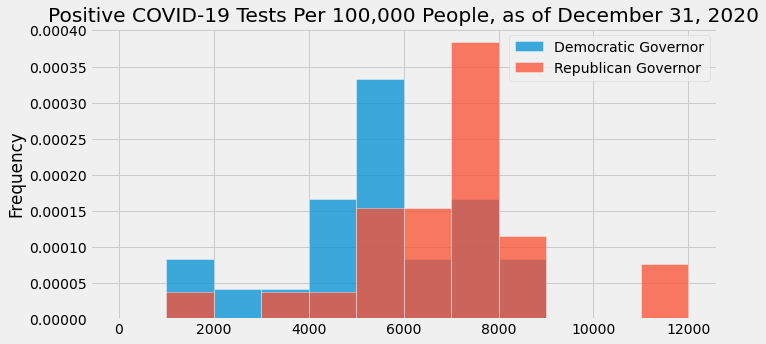

In [109]:
fig, ax = plt.subplots()
covid_bins = np.arange(0, 13000, 1000)
democratic_governors.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w', figsize=(10, 5))
republican_governors.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w')
plt.legend(['Democratic Governor', 'Republican Governor'])
plt.title('Positive COVID-19 Tests Per 100,000 People, as of December 31, 2020');

There certainly seems to be a difference in COVID rates when we break the states into two groups according to the governor's political party. Let's try to quantify just how large this difference is.

I have computed the mean COVID rate per 100,000 people as of December 31, 2020 among states with a Republican governor, and similarly, among states with a Democratic governor. Store the difference of those means (Republican minus Democratic) in the variable `difference_by_governor`.

In [121]:
difference_by_governor = abs(republican_governors.get('endPositiveRate').mean() - democratic_governors.get('endPositiveRate').mean())
difference_by_governor

1368.6203709228876

In [127]:
percentage_differance = ((republican_governors.get('endPositiveRate').mean() - democratic_governors.get('endPositiveRate').mean()-1))*100
percentage_differance

136762.03709228875

In [125]:
difference_by_governor

1367.6203709228876

In an average Republican-governed state, as compared to an average Democratic-governed state, an additional `difference_by_governor` many people out of every 100,000 got COVID in 2020. In a way, this number represents the additional risk per 100,000 people, incurred by living in a Republican-governed state during the year 2020.

In the analysis, I have divided the states into two groups based on the political party of the governor. But the governor is just one (admittedly, important) person out of millions. Would the results be different if I have divided the states into groups based on how their residents voted in the 2020 presidential election?

Since a state's residents elect the governor, we might expect that the governor would come from the same political party that the voters preferred in the 2020 presidential election. That usually happens, but not always. I have set `mismatch_states` to an array of states (full names) where the governor's political party is different than the party that was more popular among voters in the 2020 election. 

In [128]:
mismatch_states = covid_politics[covid_politics.get('govParty') != covid_politics.get('popParty')].get('state').values
mismatch_states

array(['Arizona', 'Georgia', 'New Hampshire', 'North Carolina', 'Kansas',
       'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts', 'Vermont',
       'West Virginia'], dtype=object)

I will now separate the states into groups based on the popular vote in the 2020 election. Then create a new DataFrame called `republican_residents` with the same columns as `covid_politics`, but with rows for only the states where the Republican party was more popular in the 2020 election. Similarly, I will create a `democratic_residents` DataFrame for the states where the Democratic party was more popular in the 2020 election.

In [130]:
republican_residents = covid_politics[covid_politics.get('popParty') == "Republican"]
republican_residents

,state,endPositiveRate,govParty,popParty
1,Florida,6029.356050,Republican,Republican
3,Iowa,7500.715816,Republican,Republican
8,North Carolina,5159.566487,Democratic,Republican
9,Ohio,5940.162267,Republican,Republican
11,Texas,6010.653902,Republican,Republican
...,...,...,...,...
42,South Dakota,11178.459225,Republican,Republican
43,Tennessee,8479.651867,Republican,Republican
44,Utah,8428.965129,Republican,Republican
48,West Virginia,4767.800612,Democratic,Republican


In [132]:
democratic_residents = covid_politics[covid_politics.get('popParty') == "Democratic"]
democratic_residents

,state,endPositiveRate,govParty,popParty
0,Arizona,7247.255707,Republican,Democratic
2,Georgia,5283.298216,Republican,Democratic
4,Michigan,5250.681787,Democratic,Democratic
5,Minnesota,7276.852868,Democratic,Democratic
6,Nevada,7216.630578,Democratic,Democratic
...,...,...,...,...
39,Oregon,2646.677719,Democratic,Democratic
40,Rhode Island,8168.092616,Democratic,Democratic
45,Vermont,1153.627655,Republican,Democratic
46,Virginia,4049.840339,Democratic,Democratic


Now let's compare the year-end COVID case rates when we break up the states into political groups in this way. 

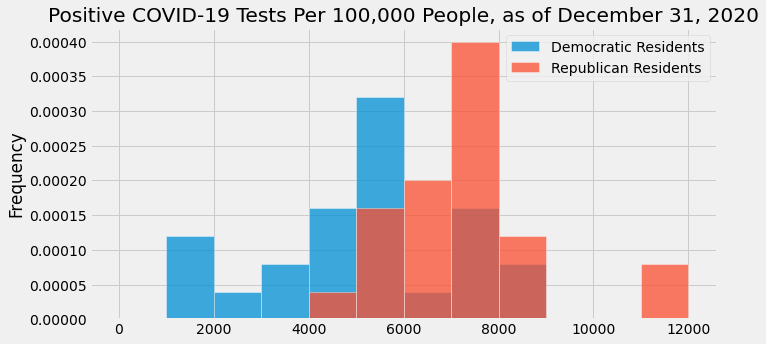

In [134]:
fig, ax = plt.subplots()
covid_bins = np.arange(0, 13000, 1000)
democratic_residents.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w', figsize=(10, 5))
republican_residents.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w')
plt.legend(['Democratic Residents', 'Republican Residents'])
plt.title('Positive COVID-19 Tests Per 100,000 People, as of December 31, 2020');

The difference between the groups looks even starker in this histogram as compared to the first, when we separated states by the governor's political party. 

As our final step, I will quantify the additional impact of living in a Republican-voting state on COVID rates.

I have set `difference_by_residents` to the average amount of additional risk per 100,000 people incurred by living in a Republican-voting state during the year 2020.

In [135]:
difference_by_residents = abs(republican_residents.get('endPositiveRate').mean() - democratic_residents.get('endPositiveRate').mean())
difference_by_residents

2141.303805169535

In [138]:
Percent_differance_by_resident = ((republican_residents.get('endPositiveRate').mean() / democratic_residents.get('endPositiveRate').mean())-1)*100
Percent_differance_by_resident

41.59476582550561

You should find that `difference_by_residents` is larger than `difference_by_governor`. This suggests that the political leanings of the residents are more important to COVID outcomes than the political party of the governor. That aligns with what we suspected when I decided to investigate voter preferences in the first place; the millions of people who live in a state have more of an impact of COVID outcomes than the sole governor. 🤝